In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML_o_train_filtered.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Columns: 274 entries, yellow sputum to conflicting_diseases
dtypes: int64(271), object(3)
memory usage: 3.5+ MB
None


# Visualize Data Distribution

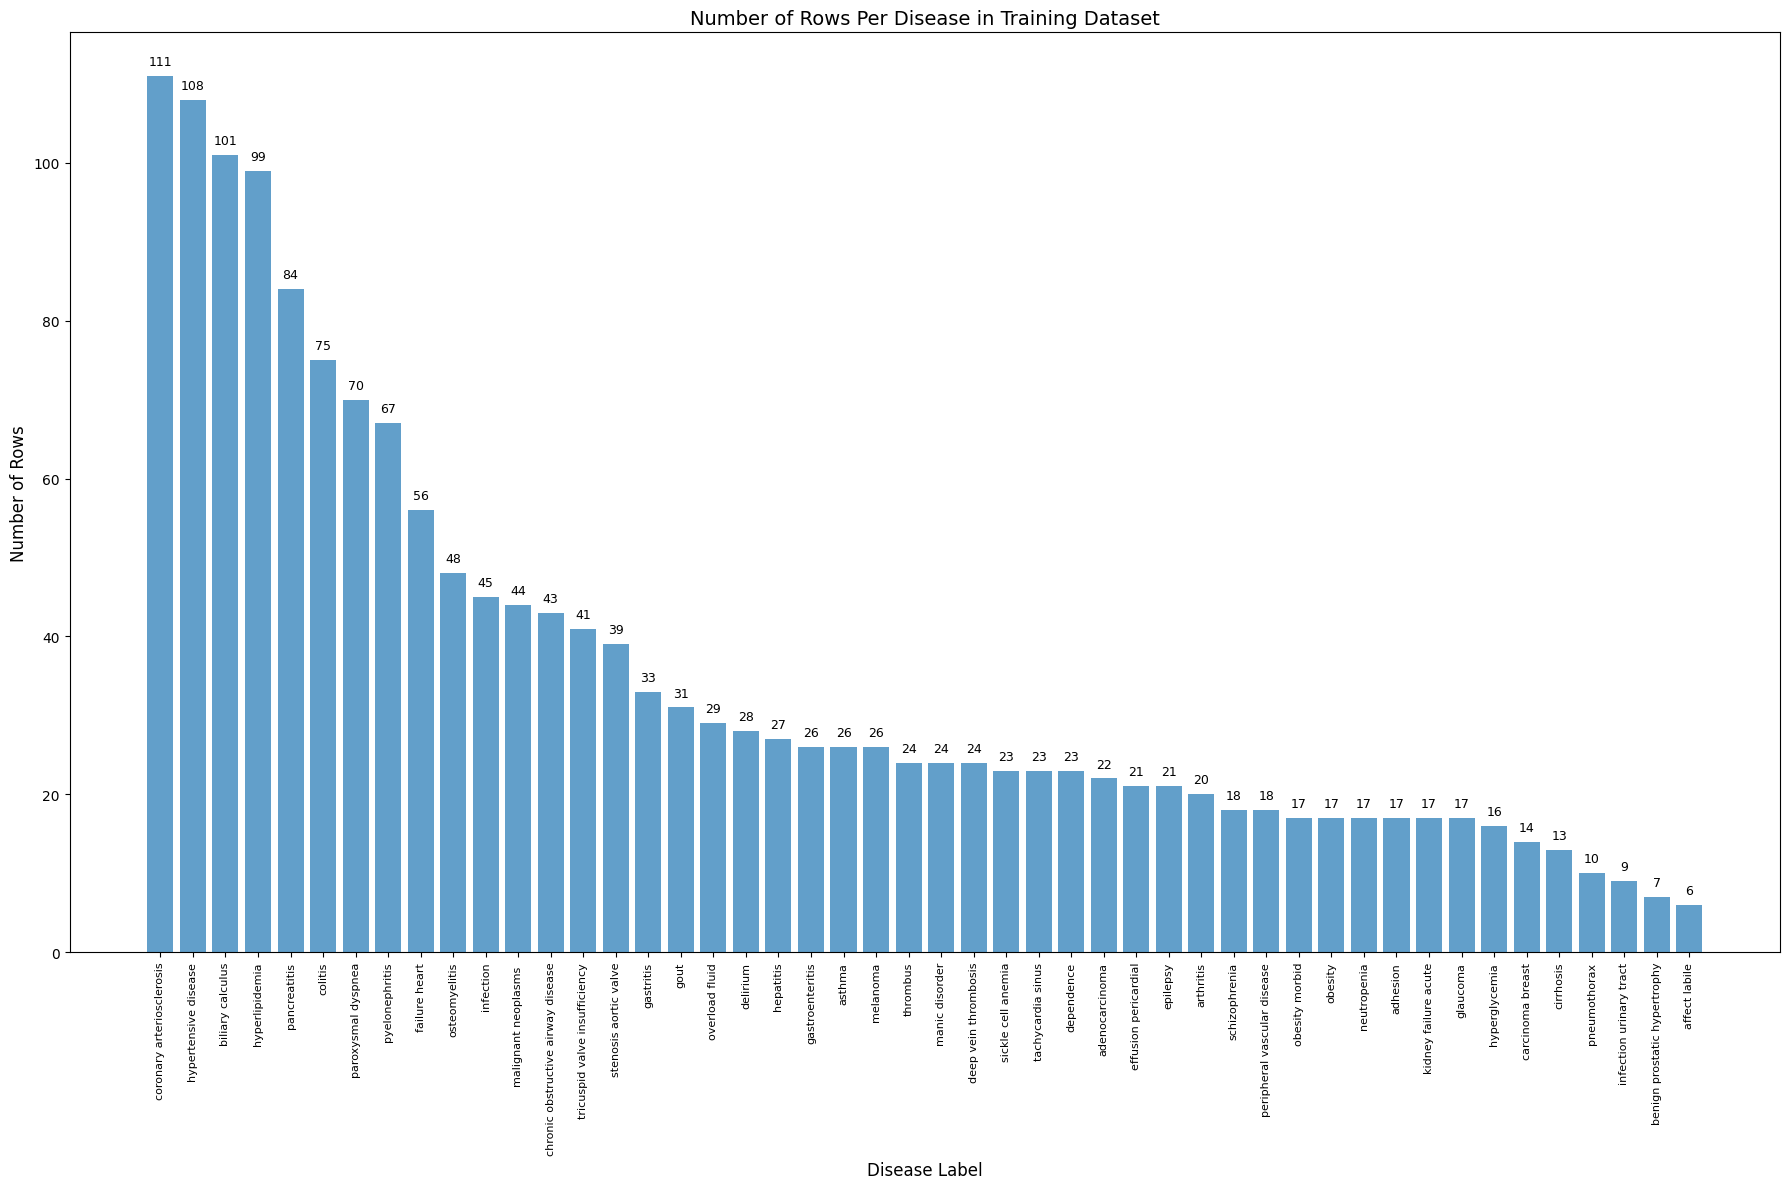

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the expanded dataset by disease to count rows per disease
disease_distribution = data["disease_label"].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 12))
bars = plt.bar(disease_distribution.index, disease_distribution.values, alpha=0.7)

# Add row counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Rows Per Disease in Training Dataset", fontsize=14)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Support Vector Classifier

In [5]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML_o_train_filtered.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML_o_val_filtered.csv")
test_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML_o_test_filtered.csv")

# Separate features and target
X_train, y_train = train_data.iloc[:, :-3], train_data["disease_label"]
X_valid, y_valid = valid_data.iloc[:, :-3], valid_data["disease_label"]
X_test, y_test = test_data.iloc[:, :-3], test_data["disease_label"]


# Create a pipeline to include scaling and SVC
svc_model = make_pipeline(
    StandardScaler(),  # Scale features for SVC
    SVC(
        kernel="rbf",  # Kernel type (can be manually changed to "rbf" or others)
        C=0.1,            # Regularization parameter (manually adjustable)
        probability=True, # Enable probability estimates
        random_state=42,
        class_weight="balanced"  # Handle class imbalance
    )
)


# Train the model on the training set
svc_model.fit(X_train, y_train)

# Validate the model on the validation set
y_valid_pred = svc_model.predict(X_valid)

valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy (for hyperparameter tuning only): {valid_accuracy:.2f}")

# Evaluate the model on the test set
y_test_pred = svc_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (final evaluation): {test_accuracy:.2f}")

# Print a detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, zero_division=0))


Validation Accuracy (for hyperparameter tuning only): 0.24
Test Accuracy (final evaluation): 0.22

Classification Report (Test Set):
                                    precision    recall  f1-score   support

                    adenocarcinoma       0.50      0.33      0.40         3
                          adhesion       0.00      0.00      0.00         2
                     affect labile       0.00      0.00      0.00         1
                         arthritis       0.00      0.00      0.00         2
                            asthma       0.00      0.00      0.00         3
      benign prostatic hypertrophy       0.00      0.00      0.00         1
                  biliary calculus       0.00      0.00      0.00        12
                  carcinoma breast       0.00      0.00      0.00         2
chronic obstructive airway disease       0.50      0.60      0.55         5
                         cirrhosis       0.00      0.00      0.00         4
                           col

# Saved Predicted Output in CSV

In [6]:
"""
import pandas as pd

# Save predictions (optional)
predictions = pd.DataFrame({"True Labels": y_test, "Predicted Labels": y_test_pred})
predictions.to_csv("/content/drive/MyDrive/P2/ML training/SVC_predictions.csv", index=False)
print("Predictions saved.")
"""

'\nimport pandas as pd\n\n# Save predictions (optional)\npredictions = pd.DataFrame({"True Labels": y_test, "Predicted Labels": y_test_pred})\npredictions.to_csv("/content/drive/MyDrive/P2/ML training/SVC_predictions.csv", index=False)\nprint("Predictions saved.")\n'

# Generate Classification Report

In [7]:

import pandas as pd
from sklearn.metrics import classification_report

# Save the classification report as CSV (optional)
report_dict = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("/content/drive/MyDrive/P2/T1/ML/SVC-o-class.csv", index=False)
print("Classification report saved.")


Classification report saved.
